<a href="https://colab.research.google.com/github/vamsipyla2000/ML_models_comparison/blob/main/ANN_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt
import warnings
# Mengabaikan peringatan
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/car_evaluation.csv", header=None)
df.shape
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Preprocessing the data
col_names = ['buying', 'maintanance', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names
df.head()

,buying,maintanance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()
# Apply the encoder to the specified columns in X_train and X_test
df[df.columns] = encoder.fit_transform(df[df.columns])
# Preview the transformed training data
df.head()


,buying,maintanance,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0


Maximum accuracy: 0.9369527101516724
Optimizer: RMSprop
Learning Rate: 0.01
Hidden Layers: 2
Optimizer: Adam, Learning Rate: 0.01, Hidden Layers: 1, Loss: 0.43498241901397705, Accuracy: 0.821366012096405
Optimizer: Adam, Learning Rate: 0.01, Hidden Layers: 2, Loss: 0.1965295523405075, Accuracy: 0.9264448285102844
Optimizer: Adam, Learning Rate: 0.01, Hidden Layers: 3, Loss: 0.2027314454317093, Accuracy: 0.9264448285102844
Optimizer: Adam, Learning Rate: 0.01, Hidden Layers: 4, Loss: 0.26241937279701233, Accuracy: 0.9106830358505249
Optimizer: Adam, Learning Rate: 0.01, Hidden Layers: 5, Loss: 0.5222278833389282, Accuracy: 0.793345034122467
Optimizer: Adam, Learning Rate: 0.001, Hidden Layers: 1, Loss: 0.44338634610176086, Accuracy: 0.7845884561538696
Optimizer: Adam, Learning Rate: 0.001, Hidden Layers: 2, Loss: 0.30408358573913574, Accuracy: 0.8739054203033447
Optimizer: Adam, Learning Rate: 0.001, Hidden Layers: 3, Loss: 0.24200274050235748, Accuracy: 0.9194395542144775
Optimizer: Ad

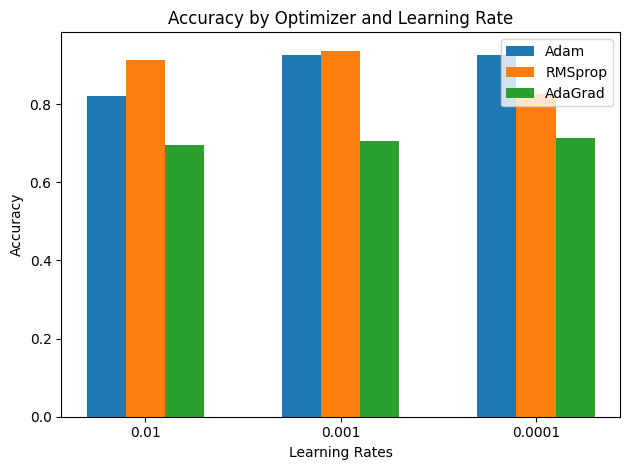

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape
# Define the parameters for the experiment
learning_rates = [0.01, 0.001, 0.0001]
optimizers = {'Adam': Adam, 'RMSprop': RMSprop, 'AdaGrad': Adagrad}
hidden_layer_sizes = [1, 2, 3, 4, 5]

# Perform the experiments
results = []
for optimizer_name, optimizer in optimizers.items():
    for lr in learning_rates:
        for hidden_layers in hidden_layer_sizes:
            # Build the model
            model = Sequential()
            model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

            for _ in range(hidden_layers):
                model.add(Dense(64, activation='relu'))

            model.add(Dense(4, activation='softmax'))

            # Compile the model
            model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=lr), metrics=['accuracy'])

            # Train the model
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

            # Evaluate the model
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

            # Save the results
            results.append((optimizer_name, lr, hidden_layers, loss, accuracy))
# Extract accuracies from results
accuracies = [result[4] for result in results]

# Find the index of the maximum accuracy
max_index = accuracies.index(max(accuracies))

# Print the details of the best result
best_result = results[max_index]
print(f"Maximum accuracy: {best_result[4]}")
print(f"Optimizer: {best_result[0]}")
print(f"Learning Rate: {best_result[1]}")
print(f"Hidden Layers: {best_result[2]}")
# Print the results
for result in results:
    optimizer_name, lr, hidden_layers, loss, accuracy = result
    print(f"Optimizer: {optimizer_name}, Learning Rate: {lr}, Hidden Layers: {hidden_layers}, Loss: {loss}, Accuracy: {accuracy}")

optimizer_names = list(optimizers.keys())
accuracies = []
for optimizer_name in optimizer_names:
    optimizer_results = [result[4] for result in results if result[0] == optimizer_name]
    accuracies.append(optimizer_results[:len(learning_rates)])

# Plot the accuracy bar chart
x = np.arange(len(learning_rates))
width = 0.2

fig, ax = plt.subplots()
for i, accuracy in enumerate(accuracies):
    ax.bar(x + i * width, accuracy, width, label=optimizer_names[i])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Learning Rates')
ax.set_title('Accuracy by Optimizer and Learning Rate')
ax.set_xticks(x + width * (len(optimizers) - 1) / 2)
ax.set_xticklabels(learning_rates)
ax.legend()

plt.tight_layout()
plt.show()


*  Accuracy of different optimizers was plotted with respect to the learning rate, it is observed that for RMSprop optimizer gave more accuracy(Maximum accuracy: 0.9369527101516724) compared to ADAM and AdaGrad
*   learning rate of 0.01 gave more accuracy with RMSprop optimizer.


*   Random forest gave better accuracy than ANN model, and ANN model is computationally expensive.




*   Random Forest: Random Forest is an ensemble method that combines multiple decision trees to reduce overfitting and increase generalization. It is relatively robust and performs well even without extensive hyperparameter tuning. The simplicity and interpretability of decision trees help Random Forests capture the structure in the data effectively without overfitting.
*   ANN (Artificial Neural Networks): ANNs are highly flexible and capable of modeling complex relationships in data. However, they require careful tuning of various hyperparameters (e.g., number of layers, number of neurons per layer, learning rate) and are prone to overfitting, especially with small datasets or insufficient regularization. This can result in lower accuracy if the model does not generalize well.





